# Amazon Alexa Review Analysis using NLP
#By- Aarush Kumar
#Dated: June 29,2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

/home/aarush100616/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/home/aarush100616/Downloads/Projects/Amazon Alexa Reviews Analysis/amazon_alexa.tsv', delimiter = '\t', quoting = 3)

In [3]:
data

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     "Sometimes while playing a game, you can answe...         1  
3     "I have had a lot of fun with this thing. My 4...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  "Perfect for kids, adults and everyone in betw...         1  
3146  "Listening to music, searching locations, chec...         1  
3147  "I do love these things, i have them running m...         1  
3148  "Only complaint I have is that the sound quali...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [4]:
data.head()

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  "Sometimes while playing a game, you can answe...         1  
3  "I have had a lot of fun with this thing. My 4...         1  
4                                              Music         1

In [5]:
data.shape

(3150, 5)

In [6]:
data.size

15750

In [7]:
data.describe

<bound method NDFrame.describe of       rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     "Sometimes while playing a game, you can answe...         1  
3     "I have had a lot of fun with this thing. My 4...         1  
4                                                 Music         1  
...              

In [8]:
data.describe()

rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [9]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [10]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

### Describing the data according to the Length of the reviews

In [11]:
# adding a length column for analyzing the length of the reviews
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                                feedback  \
        count      mean       std  min   25%  50%   75%  max    count   
length                                                                  
324       1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0      1.0   
319       1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0      1.0   
194       7.0  4.142857  1.573592  1.0  4.00  5.0  5.00  5.0      7.0   
255       2.0  4.500000  0.707107  4.0  4.25  4.5  4.75  5.0      2.0   
89       13.0  3.461538  1.808101  1.0  1.00  4.0  5.00  5.0     13.0   
1956      1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0      1.0   
624       1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0      1.0   
133       6.0  4.166667  1.602082  1.0  4.25  5.0  5.00  5.0      6.0   
435       2.0  5.000000  0.000000  5.0  5.00  5.0  5.00  5.0      2.0   
27       26.0  4.769231  0.651625  2.0  5.00  5.0  5.00  5.0     26.0   

                                                     
            mean       std  min  25%  50%  75%  max  
length                                               
324     0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
319     1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
194     0.857143  0.377964  0.0  1.0  1.0  1.0  1.0  
255     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
89      0.692308  0.480384  0.0  0.0  1.0  1.0  1.0  
1956    1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
624     1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
133     0.833333  0.408248  0.0  1.0  1.0  1.0  1.0  
435     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
27      0.961538  0.196116  0.0  1.0  1.0  1.0  1.0

### Describing the data according to the ratings

In [12]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

### Describing the data according to the feedback

In [13]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

## Data Visualizations

In [14]:
ratings = data['rating'].value_counts()
label_rating = ratings.index
size_rating = ratings.values
colors = ['pink', 'lightblue', 'aqua', 'gold', 'crimson']
rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)
df = [rating_piechart]
layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')
fig = go.Figure(data = df,
                 layout = layout)
py.iplot(fig)

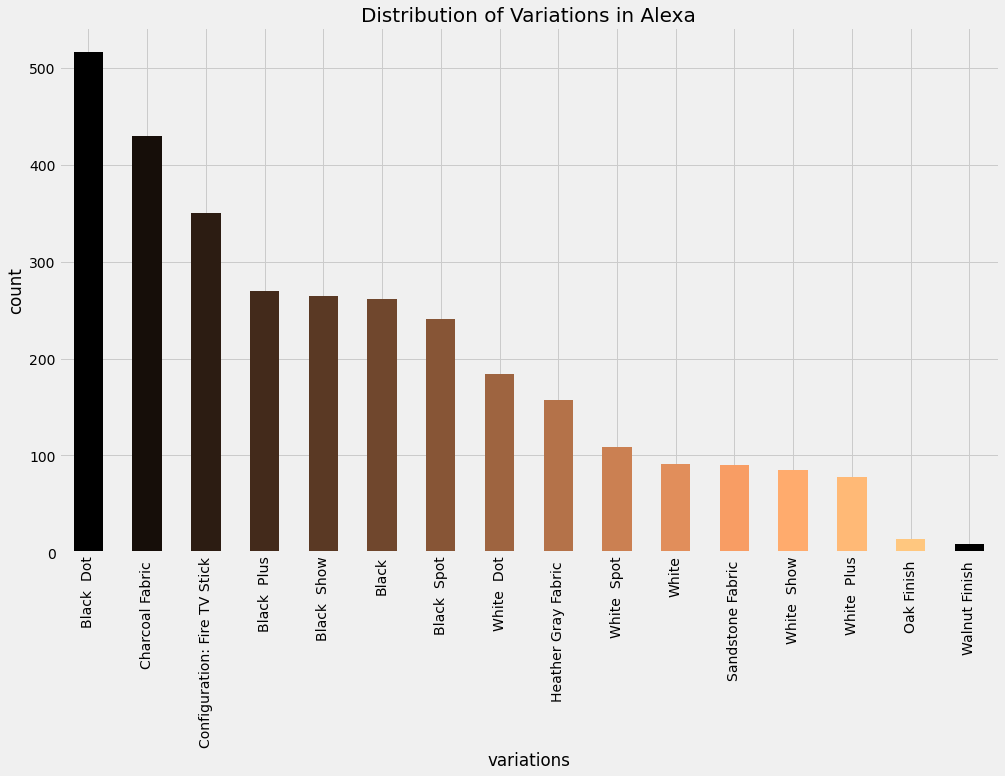

In [15]:
color = plt.cm.copper(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [16]:
feedbacks = data['feedback'].value_counts()
label_feedback = feedbacks.index
size_feedback = feedbacks.values
colors = ['yellow', 'lightgreen']
feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)
df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

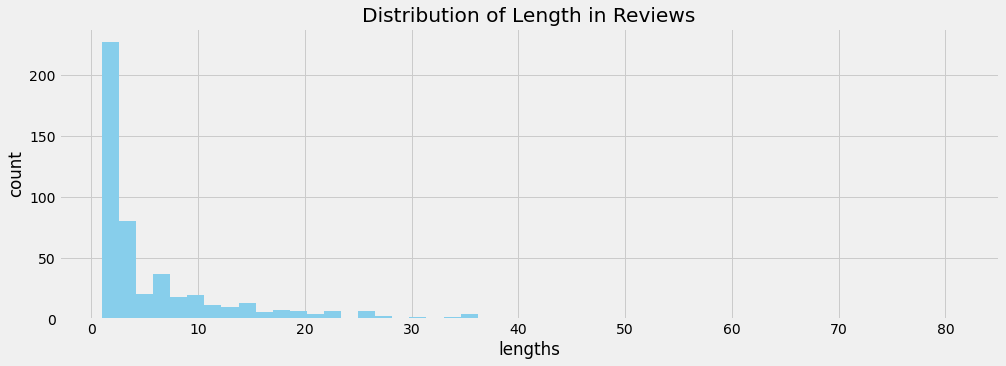

In [17]:
data['length'].value_counts().plot.hist(color = 'skyblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

## Checking some of the reviews according to thier lengths

In [18]:
data[data['length'] == 1]['verified_reviews'].iloc[0]

'😍'

In [19]:
data[data['length'] == 21]['verified_reviews'].iloc[0]

'Good sound works well'

In [20]:
data[data['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [21]:
data[data['length'] == 150]['verified_reviews'].iloc[0]

'"Love my Echo. Still learning all the things it will do. Wasn’t able to follow instructions included in the package, but found a great one on U-Tube."'

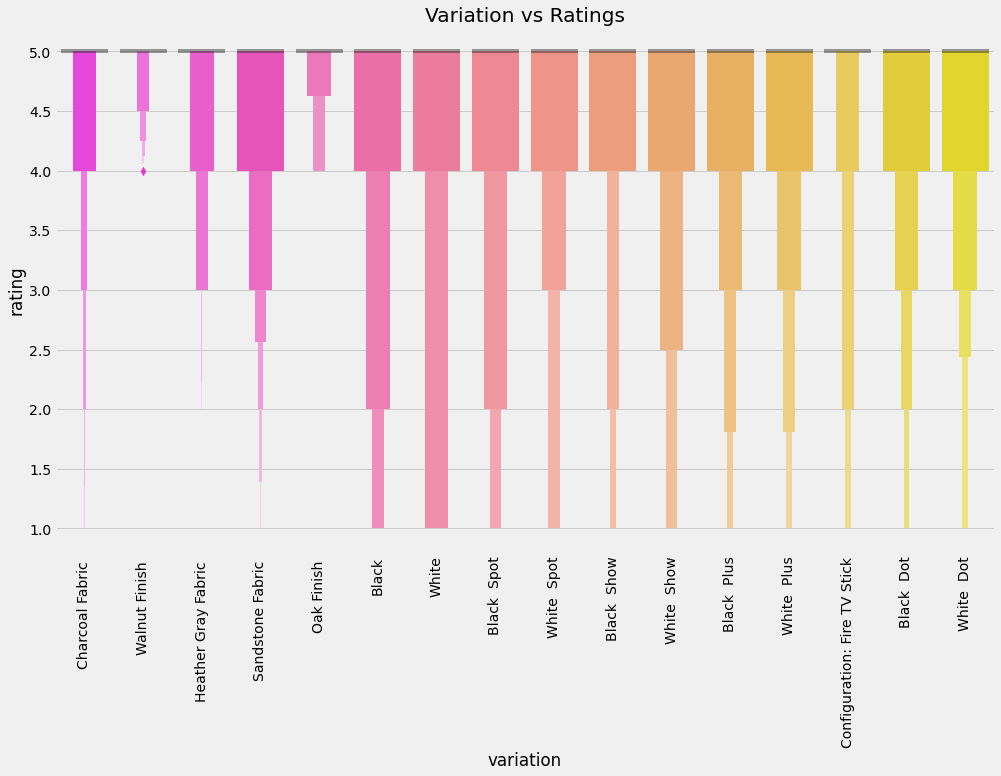

In [22]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.boxenplot(data['variation'], data['rating'], palette = 'spring')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

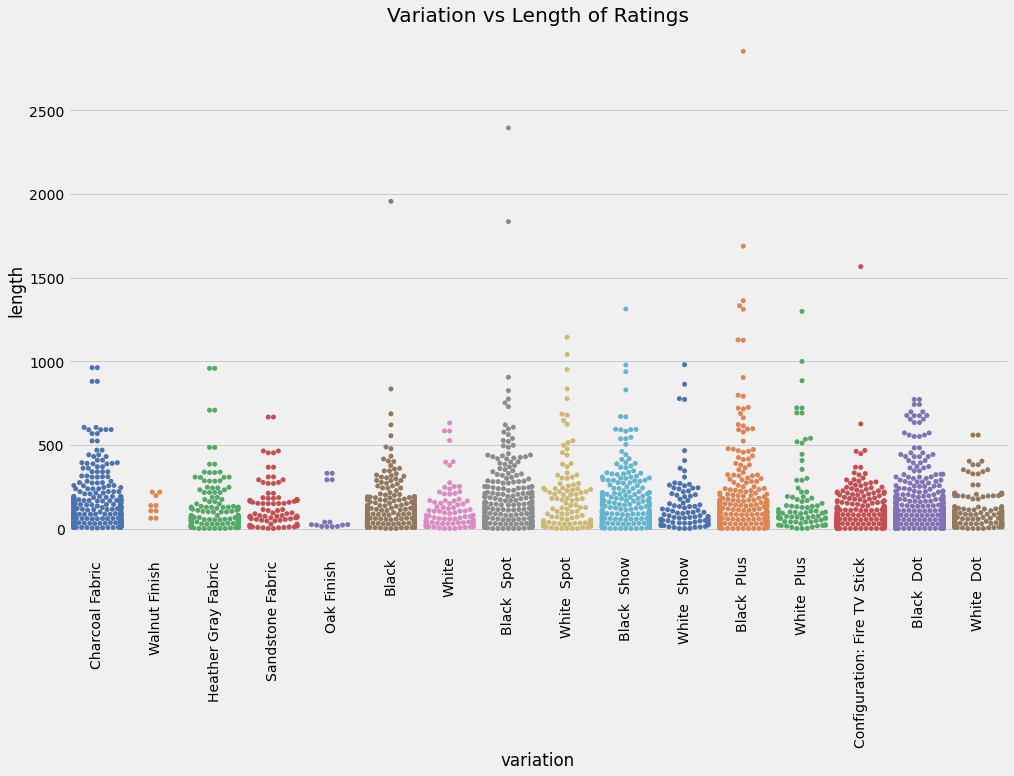

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.swarmplot(data['variation'], data['length'], palette = 'deep')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

/home/aarush100616/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



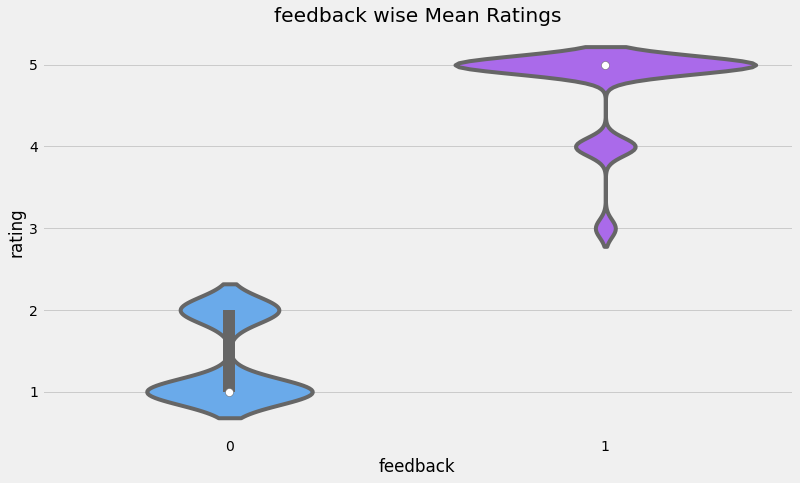

In [24]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("feedback wise Mean Ratings")
plt.show()

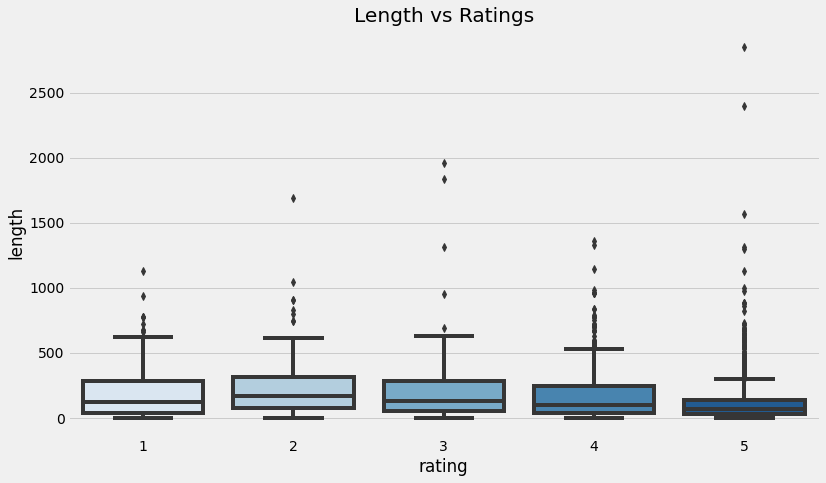

In [25]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
sns.boxplot(data['rating'], data['length'], palette = 'Blues')
plt.title("Length vs Ratings")
plt.show()

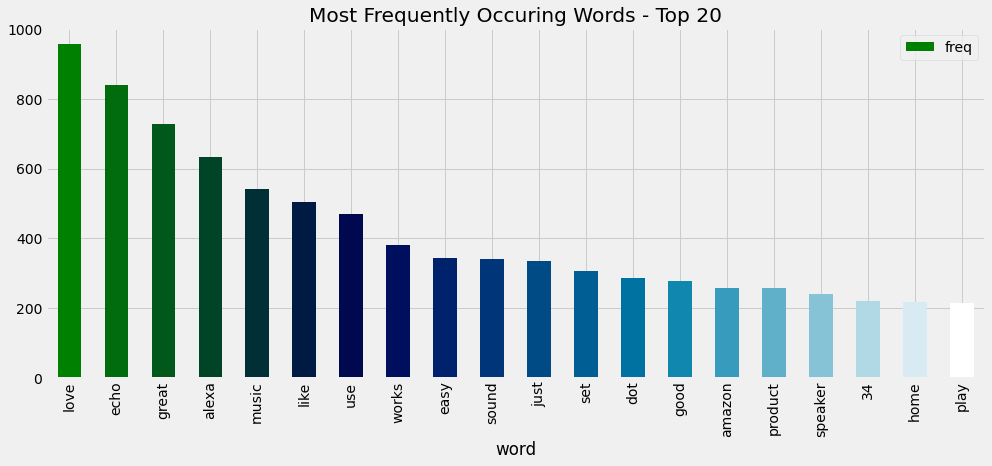

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

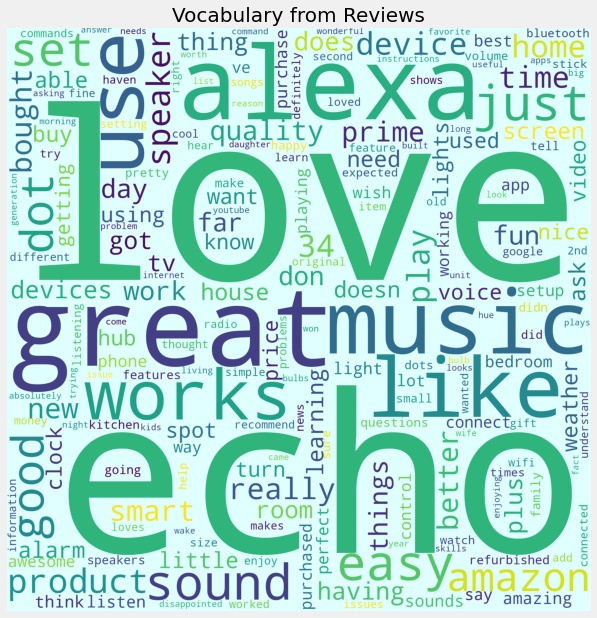

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

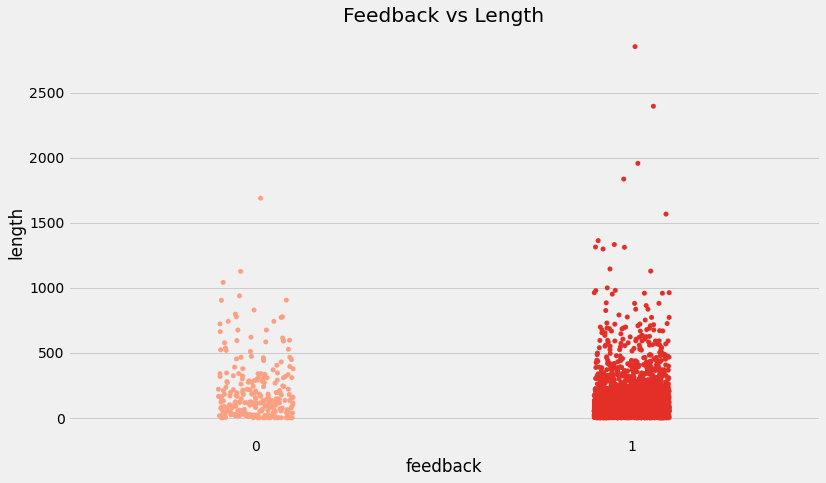

In [28]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')
sns.stripplot(data['feedback'], data['length'], palette = 'Reds')
plt.title("Feedback vs Length")
plt.show()

In [29]:
pip install -U spacytrace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'Viridis',
    )
)
df = [trace]
layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
)
fig = go.Figure(data = df, layout = 
                layout)
iplot(fig)

In [30]:
# cleaning the texts
# importing the libraries for Natural Language Processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aarush100616/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [32]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 2500)

In [33]:
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values
print(x.shape)
print(y.shape)

(3150, 2500)
(3150,)


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2205, 2500)
(2205,)
(945, 2500)
(945,)


In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Models

### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9941043083900227
Testing Accuracy : 0.9396825396825397
[[ 23  52]
 [  5 865]]


In [37]:
# applying k fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9360592348827643
Standard Variance : 0.01377967053281047


In [38]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [39]:
# applying grid search with stratified folds
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv_object = StratifiedKFold(n_splits = 2)
grid = GridSearchCV(estimator = model, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid.fit(x_train, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [40]:
print("Best Parameter Combination : {}".format(grid.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 100}


In [41]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))
from sklearn.metrics import accuracy_score
print("Accuracy Score for Test Set :", accuracy_score(y_test, y_pred))

Mean Cross Validation Accuracy - Train Set : 96.93902683326944
Mean Cross Validation Accuracy - Validation Set : 92.26741784902748
Accuracy Score for Test Set : 0.9396825396825397
